In [1]:
# Pose Estimation in Paintings
# the point of this section is to read in a big paintings dataset (the web gallery) and provide poses per image. 
# (note to self. Try training on paintings after photos and then TESTING BACK ON PHOTOS. 
# If we've learned something generalisable, it should increase our performance there too!)

In [9]:
import numpy as np
import scipy
import PIL.Image
import math
import time
#from config_reader import config_reader
#import util
#import copy
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
#import cv2 as cv 
import scipy
from scipy.ndimage.filters import gaussian_filter
import pickle
# import wget

import csv
import re
# import tqdm

In [12]:
myPaintings = pickle.load(open('myPaintings21400.p', 'rb'),fix_imports='True')


## HERE go buc corrections to the catalog, which are numerous.... 
myPaintings[7465][1] = 'http://www.wga.hu/art/c/casa/portrait_C.jpg' ## and NOT portrait_c (lowercase), the original...




UnicodeDecodeError: 'ascii' codec can't decode byte 0xf0 in position 78: ordinal not in range(128)

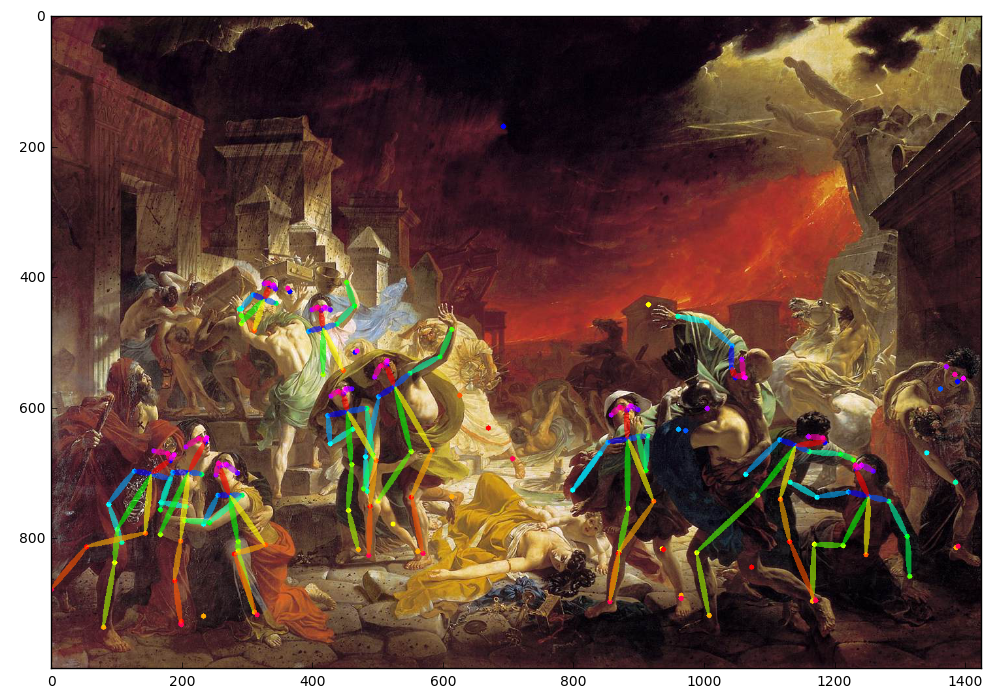

In [20]:
vis_index = 6251
image_name = myPaintings[vis_index][0]
subset     = myPaintings[vis_index][2]
candidate  = myPaintings[vis_index][3]
all_peaks  = myPaintings[vis_index][4]

colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
# find connection in the specified sequence, center 29 is in the position 15
limbSeq = [[2,3], [2,6], [3,4], [4,5], [6,7], [7,8], [2,9], [9,10], \
           [10,11], [2,12], [12,13], [13,14], [2,1], [1,15], [15,17], \
           [1,16], [16,18], [3,17], [6,18]]
# the middle joints heatmap correpondence
mapIdx = [[31,32], [39,40], [33,34], [35,36], [41,42], [43,44], [19,20], [21,22], \
          [23,24], [25,26], [27,28], [29,30], [47,48], [49,50], [53,54], [51,52], \
          [55,56], [37,38], [45,46]]
cmap = matplotlib.cm.get_cmap('hsv')

oriImg = cv.imread(image_name) # B,G,R order
canvas = cv.imread(image_name) # B,G,R order

for i in range(18):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(all_peaks[i])):
        cv.circle(canvas, all_peaks[i][j][0:2], 4, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
# plt.imshow(to_plot[:,:,[2,1,0]])
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(12, 12)

# visualize 2
stickwidth = 4

for i in range(17):
    for n in range(len(subset)):
        index = subset[n][np.array(limbSeq[i])-1]
        if -1 in index:
            continue
        cur_canvas = canvas.copy()
        Y = candidate[index.astype(int), 0]
        X = candidate[index.astype(int), 1]
        mX = np.mean(X)
        mY = np.mean(Y)
        length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
        angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
        polygon = cv.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
        cv.fillConvexPoly(cur_canvas, polygon, colors[i])
        canvas = cv.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
        
plt.imshow(canvas[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

In [19]:
# len(subset) is the number of people. 
# First test: print the number of people in portrait vs mythological vs landscape vs religious painting.

subPaintings = myPaintings[1:16300]
print(subPaintings[3][13])
port_n = 0
port_p = 0
myth_n = 0
myth_p = 0
land_n = 0
land_p = 0
relg_n = 0
relg_p = 0

for s in subPaintings:
    if s[12] == 'painting' and s[13] == 'portrait':
        port_n += 1
        port_p += len(s[2])
    
print(1.0*port_p/port_n)    
int(s[15][:4])

portrait
1.41035856574


1851